In [1]:
import Pkg
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [82cc6244] + DataInterpolations v3.11.0
  [0fc2ff8b] + LeastSquaresOptim v0.8.4
  [c03570c3] + Memoize v0.4.4
  [29dad682] + RegularizationTools v0.6.0
  [d9a01c3f] + Underscores v3.0.0


In [2]:
using Plots
import Distributions as di
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics

To recap: We assume that each data point that we are measuring is independent of each other and that each data point $y_{i}=f(x_{i},\theta)$ has an error that has been drawn from a normal distribution with zero mean and standard deviation $\sigma_{i}$. $\theta$ represents the parameters of the model $f(x,\theta)$ with which you want to fit the data.
Lets find out what we can say about the likelihood pdf of such data:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \prod_{i}\frac{1}{\sqrt{2\pi\sigma^2}}\exp\big(-\frac{(y_{i}(x_{i})-f(x_{i},\theta))^2}{2\sigma_{i}^2}\big)$$
Least-square fits are often also called $\chi^2$ fits.  $\chi^2$ is defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$
which simplifies the likelihood to:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$
now let's assume also that the prior distribution for your parameters is flat $P(\theta)=const$.  Then
$$P(\theta \mid \{y_{i}(x_{i})\}) \propto P (\{y_{i}(x_{i})\}\mid \theta)$$
and if you are only interested in the maximum value of the $P(\theta \mid \{y_{i}(x_{i})\})$ then you need to find the minimum value of $\chi^2$.  That is what people mean when they talk about least-square fitting: minimizing $\chi^2$ as a function of $\theta$.

In [3]:
x = 0:10

0:10

In [4]:
dataerr = 3.0
d = di.Normal(0,dataerr)

Distributions.Normal{Float64}(μ=0.0, σ=3.0)

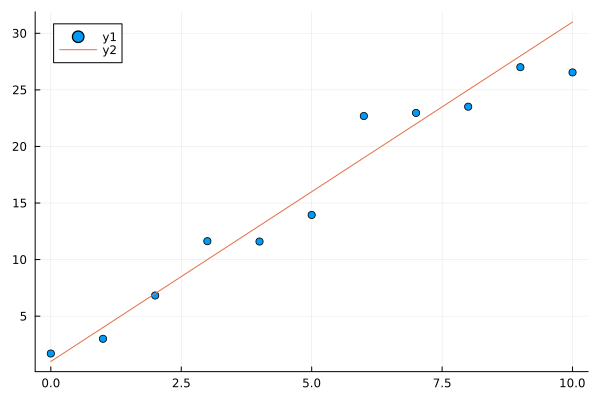

In [5]:
y = 3.0 .* x .+ 1.0 .+ rand(d,length(x))
y_true = 3.0 .* x .+ 1.0
scatter(x,y)
plot!(x,y_true)